# Problem set 1: Recap of statistics and data manipulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import pandas as pd

## 1.1 Random number generation

Draw 100 random integers (`random.randint`) from $\{3,6,7, \ldots, 10\}$. Find the mean, the standard deviation and quartiles of the sample. Find the number of occurencies of each number. Which one is the most common (`bincount`, `argmax`)?

In [36]:
X = np.random.randint(low = 3,high=10, size = 100)
print('Mean: {0}\nStandard Deveation: {1}'.format(np.mean(X),np.std(X)) )
X.sort()
print('Quartiles:\nQ1 (25th percentile): {}\nQ2 (50th percentile): {}\nQ3 (75th percentile): {}'.format(np.percentile(X,25),np.percentile(X,50),np.percentile(X,75)))
unique_val,counts = np.unique(X, return_counts=True)
print('unique values: ',unique_val,'\noccurencies of each number:',counts)
print('the most common number is : ',unique_val[np.argmax(counts)])

Mean: 6.14
Standard Deveation: 1.9288338445807092
Quartiles:
Q1 (25th percentile): 5.0
Q2 (50th percentile): 6.0
Q3 (75th percentile): 7.25
unique values:  [3 4 5 6 7 8 9] 
occurencies of each number: [13 11 14 13 24 10 15]
the most common number is :  7


## 1.2 Histogram, KDE

Draw an $n=1000$-element sample from a random variable defined as $$Z = AX +(1-A)Y,$$
where $A$, $X$, and $Y$ are independent and such that $\mathbb{P}[A=0]=0.3=1-\mathbb{P}[A=1]$, and $X$ and $Y$ are Gaussian with means $1$ and $5$, respectively, and unit variances. 

Prepare a histogram (`matplotlib.pyplot.stairs` or `numpy.hist`). Find the true probability density function of $Z$ (`scipy.stats.norm`) and add a line representing this function to the plot.

Prepare a similar plot with a kernel density estimate. 

<!-- _Hint: Use can use 'numpy', 'matplotlib' and 'scipy' libraries_ -->

In [48]:
X = np.random.normal(1, 1, 1000)
Y = np.random.normal(5, 1, 1000)
A = np.random.binomial(n= 1, p =0.7,size = 1000)
Z = A*X + (1-A)*Y
Z

array([ 2.03668763e+00,  2.80919602e-01,  2.55659315e+00,  5.73879318e+00,
        4.77346213e+00,  5.44152938e+00,  5.56360189e+00,  2.40889411e+00,
        5.07329565e+00,  1.56033638e+00,  1.54760671e+00,  5.01116003e-01,
        2.02884915e-01,  1.81594047e+00,  4.34446831e+00,  4.75870299e+00,
       -1.03280904e+00,  1.87726011e+00,  6.51969961e+00, -4.63377591e-01,
        3.43891256e+00,  5.01137363e+00,  8.20651172e-01,  7.41485037e-01,
        9.24168846e-01,  7.26292092e-01,  3.53839095e+00, -9.55981878e-02,
        2.06942961e+00, -2.46821218e+00,  3.45707274e+00,  4.62845024e+00,
        5.92376530e+00,  4.73516909e+00,  2.32489154e-01,  1.36864176e+00,
        4.39031278e+00,  3.42230222e+00,  4.87774962e+00,  4.20685931e-01,
       -1.86208286e+00,  1.77150998e+00,  1.81921181e+00,  1.92448026e+00,
        2.36098556e+00,  1.39721229e+00,  1.12790465e+00,  1.10521209e+00,
        5.39756166e-01,  1.31394667e+00,  5.42700816e+00,  2.09156695e+00,
       -8.65830201e-01,  

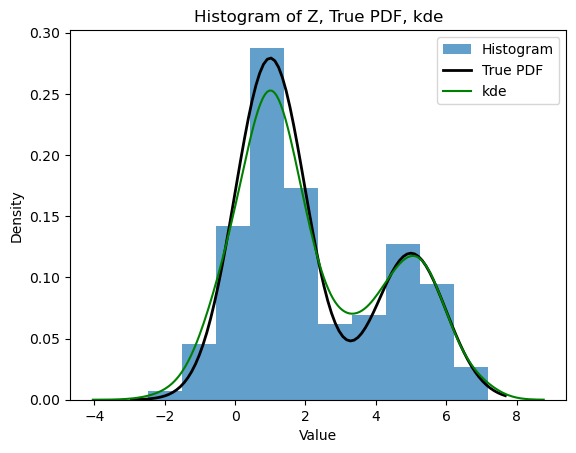

In [78]:
import seaborn as sns
from scipy.stats import norm

plt.hist(Z, bins=10, density=True, alpha=0.7, label='Histogram')

xmin, xmax = plt.xlim()
x_values = np.linspace(xmin, xmax, 100)
pdf_values = norm.pdf(x_values, loc=1, scale=1) * 0.7 + norm.pdf(x_values, loc=5, scale=1) * 0.3
plt.plot(x_values, pdf_values, 'k-', linewidth=2, label='True PDF')

sns.kdeplot(Z, color='green', label = 'kde')

plt.title('Histogram of Z, True PDF, kde')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()


plt.show()

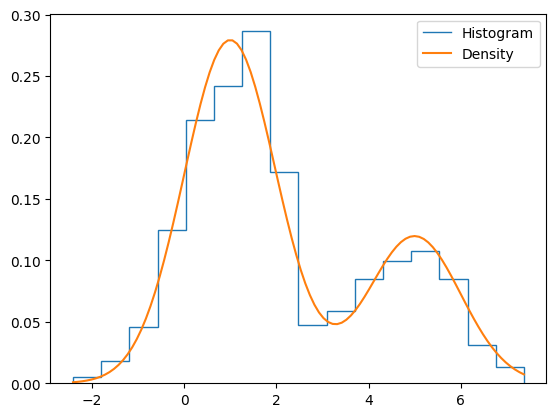

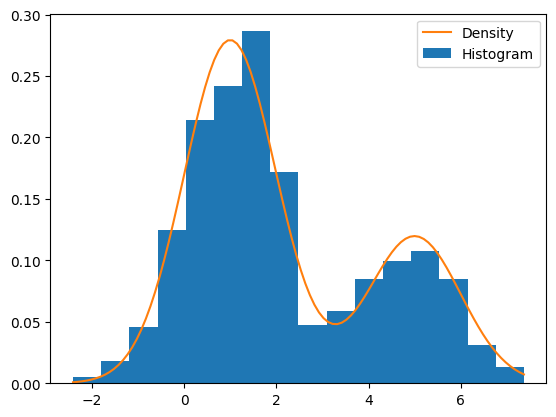

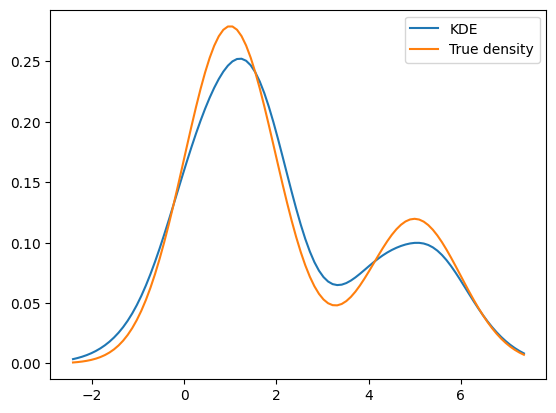

## 1.3 Data whitening

Draw a table from the multivariate normal distribution (`random.multivariate_normal`) representing $1000$ points in $\mathbb{R}^3$. Define a function which *whitens* the dataset according to the formula

$$
x_{ij} = \frac{x_{ij}-\hat\mu_j}{\hat\sigma_j},
$$

where  $\hat\mu_j$ and $\hat\sigma_j$ is a margin sample mean and standard deviation.

Apply the function on the generated dataset and check the means vector and covariance (`numpy.cov`) matrix.

In [109]:
mean = np.array([0.96422334, 1.00093861 ,0.94390558])
conv = np.array( [[3.93096311 ,1.04185139, 0.22450131],[1.04185139 ,3.89680413 ,0.14455424],[0.22450131 ,0.14455424, 3.95283302]])
X = np.random.multivariate_normal(mean, conv, size = 1000)

print('Initial mean:',mean)
print('Initial conv:',conv)

def whiten(X):
    for col in range(3):
        X[:,col] = (X[:,col] - np.mean(X[:,col]))/np.std(X[:,col])
    return X


print('Whitened mean:',np.mean(whiten(X), axis = 0))
print('Whitened conv:',np.cov(whiten(X).T))

Initial mean: [0.96422334 1.00093861 0.94390558]
Initial conv: [[3.93096311 1.04185139 0.22450131]
 [1.04185139 3.89680413 0.14455424]
 [0.22450131 0.14455424 3.95283302]]
Whitened mean: [-1.11022302e-19  1.22124533e-17  1.42108547e-17]
Whitened conv: [[1.001001   0.26247218 0.04099633]
 [0.26247218 1.001001   0.07177004]
 [0.04099633 0.07177004 1.001001  ]]


Initial mean: [0.96422334 1.00093861 0.94390558]
Initial covariances:
 [[3.93096311 1.04185139 0.22450131]
 [1.04185139 3.89680413 0.14455424]
 [0.22450131 0.14455424 3.95283302]]
Whitened mean: [ 9.23740251e-18  5.61772850e-16 -2.18269847e-16]
Whitened covariances:
 [[1.001001   0.26646276 0.05700982]
 [0.26646276 1.001001   0.03686861]
 [0.05700982 0.03686861 1.001001  ]]


## 1.4 Data manipulation

Load data from 'cars_multi.csv' file (`pandas.read_csv`). 

- Transform column *weight* from pounds to kilograms (1 lb = 0.45 kg).
- Transform column *origin* to factor with levels 1 = USA, 2 = Europe, 3 = Japan (`cat.rename_categories`).
- Create a new column *lkm* indicating fuel consumption in litres for 100 kilometers. Use *mpg* giving the number of miles a vehicle can travel using one gallon of fuel (1 gallon = 3.8 litre, 1 mile = 1.6 km).

Then
- Check basic data statistics (`pandas.describe`).
- Find the average fuel consumption of American cars produced in 1970 and 1982 (production year is denoted in the column *model*).
- Find the market share of 8-cylinder American cars produced in 1970 and 1982.

In [148]:
import pandas as pd


df = pd.read_csv('data/cars_multi.csv')

df['weight'] *= 0.45

new_categories = ['usa', 'eu', 'jap']
df['origin'] = df['origin'].astype('category')
df['origin'] = df['origin'].cat.rename_categories(new_categories)

df['lkm'] = 380 / (1.6*df['mpg'])

df.head()
df.describe()

,ID,mpg,cylinders,displacement,weight,acceleration,model,lkm
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,199.500000,23.514573,5.454774,193.425879,1336.691080,15.568090,76.010050,11.322005
std,115.036951,7.815984,1.701004,104.269838,381.078798,2.757689,3.697627,3.939996
min,1.000000,9.000000,3.000000,68.000000,725.850000,8.000000,70.000000,5.096567
25%,100.250000,17.500000,4.000000,104.250000,1000.687500,13.825000,73.000000,8.189655
50%,199.500000,23.000000,4.000000,148.500000,1261.575000,15.500000,76.000000,10.326087
75%,298.750000,29.000000,8.000000,262.000000,1623.600000,17.175000,79.000000,13.571429
max,398.000000,46.600000,8.000000,455.000000,2313.000000,24.800000,82.000000,26.388889


Find the average fuel consumption of American cars produced in 1970 and 1982 (production year is denoted in the column model).

In [165]:
# wartosci sie nie zgadzaja z tymi z przykladowego rozwiazania, ale nie wiem co innego mogłoby 

cars70 = df[(df['origin']=='usa') & (df['model']==70)]
cars82 = df[(df['origin']=='usa') & (df['model']==82)]

lkm70 = cars70['lkm'].mean()
lkm82 = cars82['lkm'].mean()


print('Average fuel consumption of 1970 USA cars', lkm70)
print('Average fuel consumption of 1982 USA cars', lkm82)

Average fuel consumption of 1970 USA cars 16.421821225046493
Average fuel consumption of 1982 USA cars 8.270765524953125


Find the market share of 8-cylinder American cars produced in 1970 and 1982.
Market share = nr_8cyl_cars / np_cars

In [174]:
nr_8cyl_cars_70 = cars70[df['cylinders']==8].shape[0]
nr_8cyl_cars_82 = cars82[df['cylinders']==8].shape[0]
nr_cars = cars70.shape[0]

print('Market share of 1970 USA 8-cylinder cars:', nr_8cyl_cars_70/nr_cars)
print('Market share of 1982 USA 8-cylinder cars:', nr_8cyl_cars_82/nr_cars)

Market share of 1970 USA 8-cylinder cars: 0.8181818181818182
Market share of 1982 USA 8-cylinder cars: 0.0


/var/folders/zy/jl2rn8kj7cx0g35_dvq0zksh0000gn/T/ipykernel_21485/1335759393.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nr_8cyl_cars_70 = cars70[df['cylinders']==8].shape[0]
/var/folders/zy/jl2rn8kj7cx0g35_dvq0zksh0000gn/T/ipykernel_21485/1335759393.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nr_8cyl_cars_82 = cars82[df['cylinders']==8].shape[0]


## 1.5 Data visualisation

Use 'cars_multi.csv' dataset and problem 1.4.

- Prepare a scatterplot for fuel consumption vs. weight. Indicate a car's origin by different colours.
- Prepare boxplots for fuel consumption of US cars by years (`seaborn.boxplot`).
- Find some other interesting effects in this dataset.

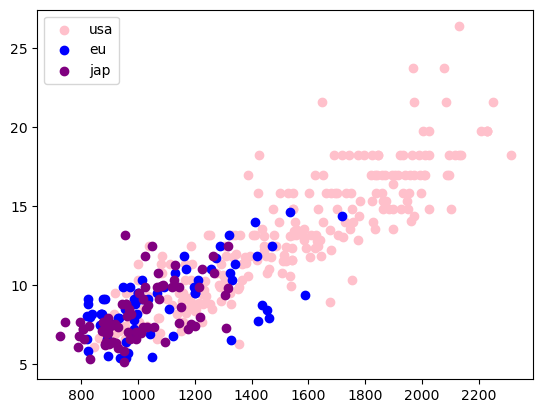

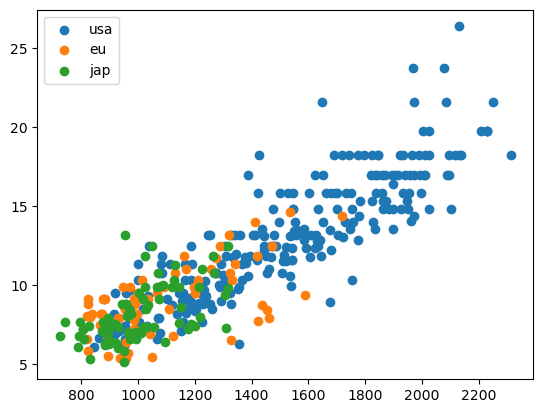

In [191]:
plt.scatter(df[df['origin']=='usa']['weight'],df[df['origin']=='usa']['lkm'], color ='pink', label = 'usa')
plt.scatter(df[df['origin']=='eu']['weight'],df[df['origin']=='eu']['lkm'], color ='b',label = 'eu')
plt.scatter(df[df['origin']=='jap']['weight'],df[df['origin']=='jap']['lkm'], color ='purple',label = 'jap')

plt.legend()
plt.show()

for origin, group in df.groupby('origin'):
    plt.scatter(group['weight'], group['lkm'], label = origin)
    
plt.legend()

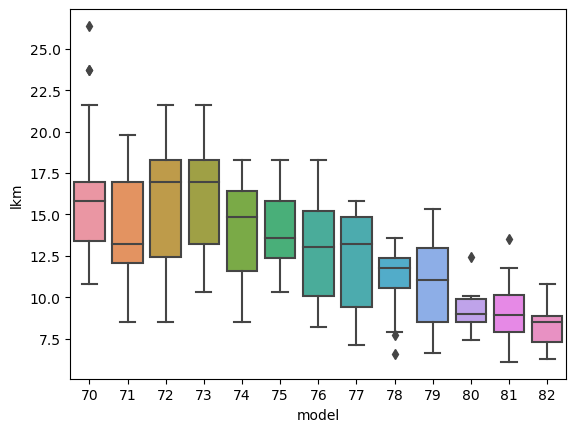

<AxesSubplot:xlabel='lkm', ylabel='Density'>

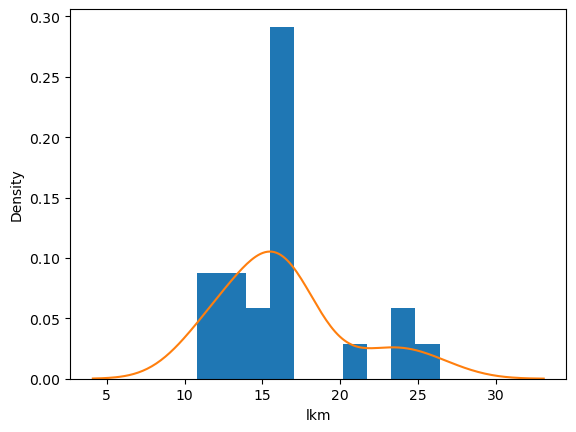

In [203]:
sns.boxplot(data = df[df['origin']=='usa'],x = 'model', y = 'lkm')
plt.show()
x = df[(df['origin']=='usa') & (df['model']==70)]['lkm']
plt.hist(x, density=True)
sns.kdeplot(x)